In [1]:
library('tidyverse')
library('palmerpenguins')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Visualization

In [3]:
# pipes pass data to the function on the right

penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Chart properties like:
1. The position of a point along an axis, or,
1. The color of a bar,
encode information from **columns** in the table(s) we are visualizing. That is, we can map any column in our table to some chart property.

The type of chart is dictated by the shape we use as data markings. These shapes are called `geoms` in [ggplot2](https://ggplot2.tidyverse.org/).

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


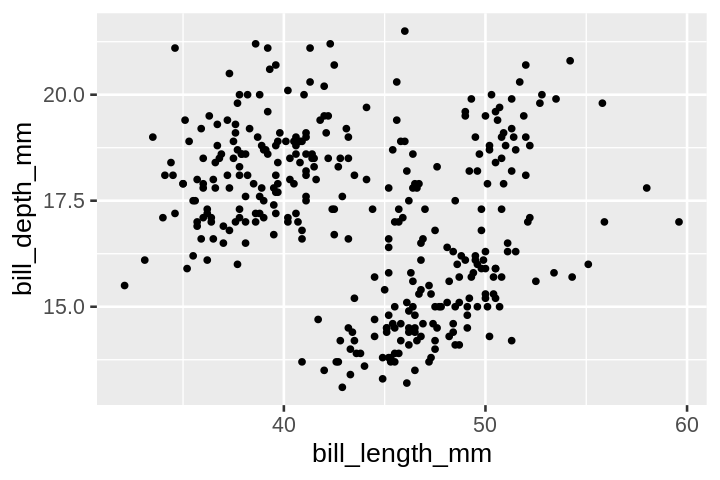

In [7]:
# Scatter chart uses geom_point

options(repr.plot.width = 6, repr.plot.height = 4)
theme_set(theme_gray(base_size = 16))

ggplot(data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
    geom_point()

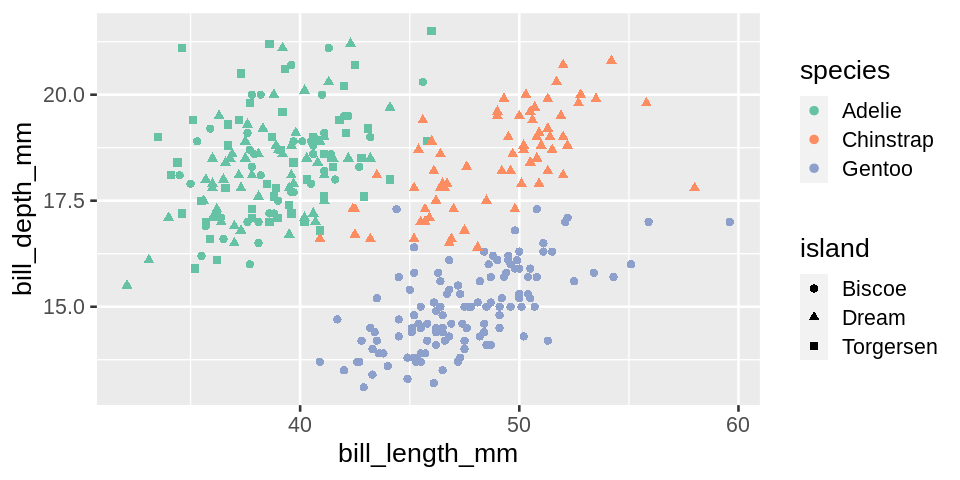

In [13]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(data = penguins, mapping = aes(x = bill_length_mm, 
                                      y = bill_depth_mm,
                                      color = species,
                                      shape = island)) + 
    geom_point(na.rm = TRUE, size = 2) +
    scale_color_brewer(palette = 'Set2')

Scale functions adjust our encodings. E.g. linear to log scale for the x-axis encoding or changing the palette for a color encoding.

## Grouping, filtering, summarizing, mutating

We often have to aggregate, filter, and/or summarize our data to make sense of it and prepare it for visualization.

In [14]:
penguins |> summarize(mean_bill_depth_mm = mean(bill_depth_mm, na.rm = TRUE))

mean_bill_depth_mm
<dbl>
17.15117


In [15]:
penguins |> 
    group_by(species) |>
    summarize(mean_bill_depth_mm = mean(bill_depth_mm, na.rm = TRUE))

species,mean_bill_depth_mm
<fct>,<dbl>
Adelie,18.34636
Chinstrap,18.42059
Gentoo,14.98211


In [16]:
penguins |>
    count(species)

species,n
<fct>,<int>
Adelie,152
Chinstrap,68
Gentoo,124


In [17]:
penguins |>
    group_by(island) |>
    count(species)

island,species,n
<fct>,<fct>,<int>
Biscoe,Adelie,44
Biscoe,Gentoo,124
Dream,Adelie,56
Dream,Chinstrap,68
Torgersen,Adelie,52


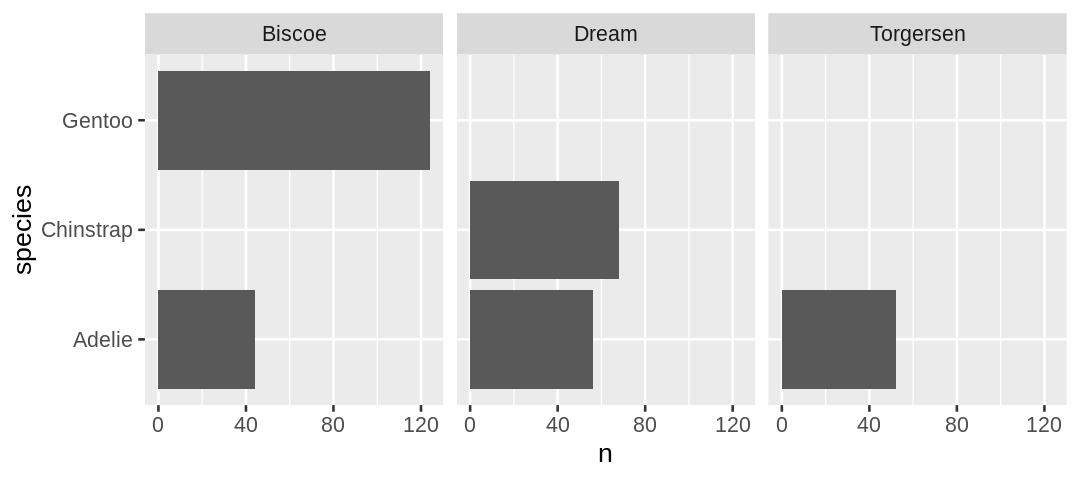

In [22]:
options(repr.plot.width = 9, repr.plot.height = 4)

penguins |>
    group_by(island) |>
    count(species) |>
ggplot(mapping = aes(x = n, y = species)) +
    geom_col() +
    facet_wrap(~island, ncol = 3)

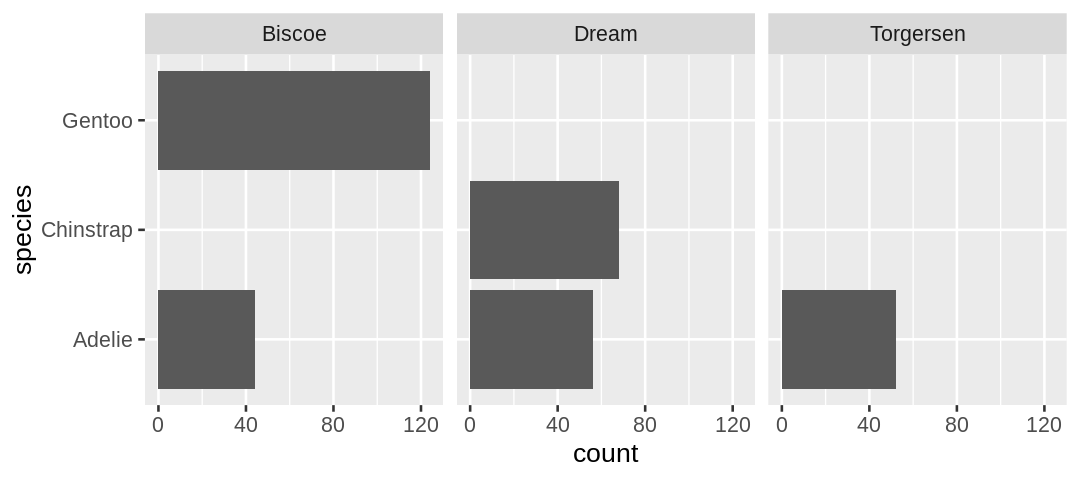

In [23]:
options(repr.plot.width = 9, repr.plot.height = 4)

ggplot(data = penguins, mapping = aes(y = species)) +
    geom_bar() +
    facet_wrap(~island, ncol = 3)

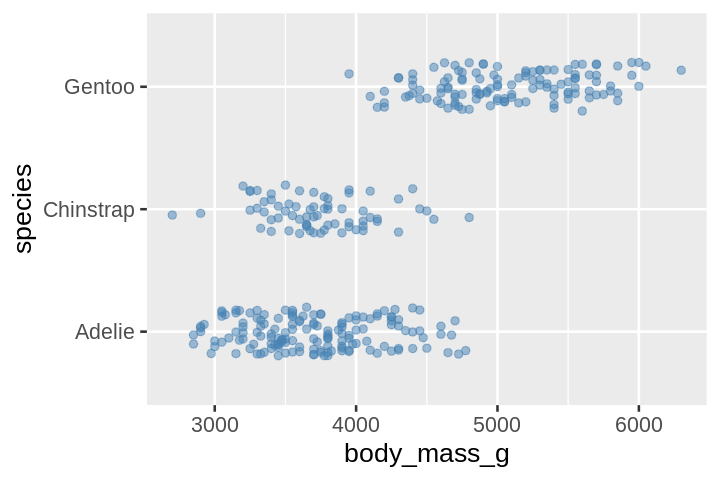

In [26]:
# can use positional arguments

options(repr.plot.width = 6, repr.plot.height = 4)

ggplot(penguins, aes(x = body_mass_g, y = species)) +
    geom_point(na.rm = T,
               alpha = 0.5, 
               size = 2,
               color = 'steelblue', 
               position = position_jitter(height = 0.2, width = 0))

In [27]:
penguins |> 
    mutate(body_mass_kg = body_mass_g / 1000) |>
    head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,3.75
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,3.80
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,3.25
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,3.45
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,3.65


## Pivoting

In [28]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [29]:
penguins |> glimpse()

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


How to plot overlapping histograms of `bill_length_mm` and `bill_depth_mm`?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


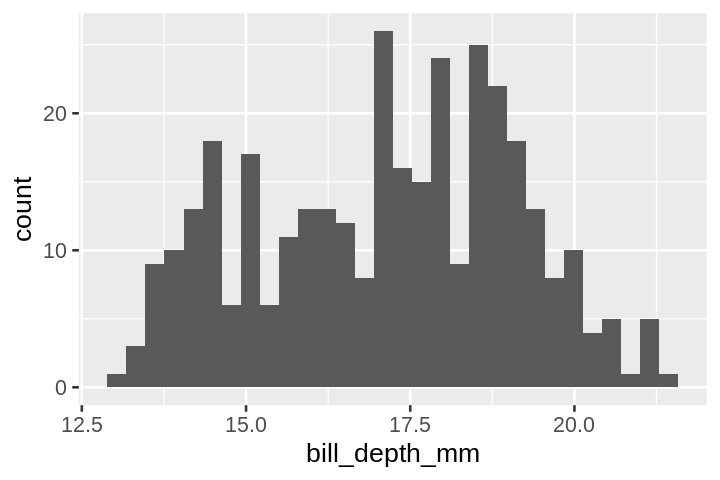

In [33]:
ggplot(penguins, aes(x = bill_depth_mm)) + 
    geom_histogram(na.rm = T)

In [35]:
penguins |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm)) |> head() #|>
# ggplot(aes(x = value, fill = name)) +
#     geom_histogram(position = 'identity', alpha = 0.5) +
#     scale_fill_brewer(palette = 'Dark2')

species,island,flipper_length_mm,body_mass_g,sex,year,name,value
<fct>,<fct>,<int>,<int>,<fct>,<int>,<chr>,<dbl>
Adelie,Torgersen,181,3750,male,2007,bill_length_mm,39.1
Adelie,Torgersen,181,3750,male,2007,bill_depth_mm,18.7
Adelie,Torgersen,186,3800,female,2007,bill_length_mm,39.5
Adelie,Torgersen,186,3800,female,2007,bill_depth_mm,17.4
Adelie,Torgersen,195,3250,female,2007,bill_length_mm,40.3
Adelie,Torgersen,195,3250,female,2007,bill_depth_mm,18.0
